# Статистика, DS-поток
## Задание SP.1

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 80 баллов

**Важность задач:**

* *высокая:* задачи 3;
* *средне-высокая:* задачи 1, 4;
* *обычная* задачи 2.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

In [1]:
# Bot check

# HW_ID: ds_sp1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

import time

sns.set(palette='Set2')

---
## Задача 1.

Реализуйте метод Монте-Карло и метод прямоугольников численного интегрирования функций, используя приведенный ниже шаблон. Реализация должна уметь оценивать интегралы вида
$$ \int\limits_{\ell_1}^{h_1} ... \int\limits_{\ell_d}^{h_d} f(x_1, ... , x_d)\ dx_1 ... dx_d $$
для произвольной заданной функции $f$.

Реализация получает на вход векторы $\ell = (\ell_1, ... , \ell_d)$ и $h = (h_1, ... ,h_d)$, а также число $n$ &mdash; количество итераций оценки интеграла. В случае метода прямоугольников число итераций равно количеству используемых прямоугольников, а в случае метода Монте-Карло &mdash; размеру генерируемой выборки. 

*Требования:*
1. Значение функции $f$ можно посчитать только в $n$ точках.
2. Реализация не должна использовать какие-либо циклы, кроме циклов по числу интегралов $d$.
3. Для ускорения вычислений генерацию случайных чисел стоит производить с помощью `numpy.random`.
4. При реализации метода прямоугольников используйте равномерное разбиение по каждой координатной оси.

*Подсказка:* при реализации метода Монте-Карло обрати внимание на один из примеров с лекции.

Для быстрой работы метода прямоугольников используйте функцию <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html">`numpy.meshgrid`</a>. Ниже есть пример ее использования. 

In [3]:
# Предположим, мы хотим получить координаты всех целых точек (x, y), 
# таких, что x лежит в промежутке [5, 6], а y - в промежутке [-3, -1]

linspace_x = [5, 6]  
linspace_y = [-3, -2, -1]

# возвращает матрицы с координатами сетки,
# задаваемой проекциями точек на оси координат
X, Y = np.meshgrid(linspace_x, linspace_y)

print("X: ", X)  # linspace_x повторилась len(linspace_y) раз по оси 0
print("Y: ", Y)  # linspace_y повторилась len(linspace_x) раз по оси 1

print(np.meshgrid(linspace_x, linspace_y))

# преобразуем исходный формат к вектору точек
# np.stack([X, Y]).reshape(2, -1).T
# np.stack(np.meshgrid(linspace_x, linspace_y))

X:  [[5 6]
 [5 6]
 [5 6]]
Y:  [[-3 -3]
 [-2 -2]
 [-1 -1]]
[array([[5, 6],
       [5, 6],
       [5, 6]]), array([[-3, -3],
       [-2, -2],
       [-1, -1]])]


In [4]:
class Integrator:
    
    @staticmethod
    def integrate(func, low, high, n_iter, method="rectangle"):
        """
        Оценка определенного интеграла.
        
        Аргументы:
        f --- векторная функция d-мерной переменной.
            Реализация функции на вход принимает матрицу (n, d),
            где n - число точек, в которых нужно вычислить функцию,
            а d - размерность пространства переменных.
            Функция должна вернуть вектор размерности n.
        low, high --- нижние и верхние пределы интегрирования,
            векторы размера d. Передаются в том же порядке,
            в котором функция принимает аргументы.
        n --- максимальное число вызовов функции f.
        method --- метод ("rectangle" или "monte_carlo").
                            
        Возвращает приближенное значение интеграла.
        """
        
        assert len(low) == len(high)
        low, high = map(np.array, [low, high])
        n_iter = int(n_iter)

        return Integrator.methods[method](func, low, high, n_iter)
    
    
    def integrate_monte_carlo(func, low, high, n_iter):
        """
        Метод монте-карло

        Возвращает приближенное значение интеграла.
        """
        d = len(low)
        
        # Объем прямоугольника
        volume = np.prod(high - low) / n_iter

        # Генерация точек 
        points = np.random.uniform(low, high, size=(n_iter, d))
        
        values = func(points)
        
        return np.sum(values) * volume 
    
    
    def integrate_rectangle(func, low, high, n_iter):
        """
        Метод прямоугольников

        N прямоугольников, d измерений
        N^{1/d} отрезков в каждом измерении

        Возвращает приближенное значение интеграла.        
        """
        d = len(low)

        # Число отрезков по умолчанию в каждом измерении
        section_count_default = round(np.floor(np.power(n_iter, 1.0 / d)))

        # Улучшаем если можно
        section_counts = np.array([section_count_default] * d)

        for i in range(d):
            section_counts[i] += 1
            if np.prod(section_counts) > n_iter:
                section_counts[i] -= 1
                break

        # Объем прямоугольника
        volume = np.prod((high - low) / section_counts)

        # Координаты центров прямоугольников (section_count x d)
        middles = [np.linspace(low[i], high[i], 2 * section_counts[i] + 1)[1::2] for i in range(d)]

        # Сетка
        grid = [element.flatten() for element in np.meshgrid(*middles)]

        # Финальные точки N x d
        points = np.stack(grid, axis=1)

        values = func(points)
        
        return np.sum(values) * volume
    
    
    methods = {
        "rectangle": integrate_rectangle,
        "monte_carlo": integrate_monte_carlo
    }

Исследуем работу реализованных методов по оценке интеграла
$$\int\limits_0^1 ... \int\limits_0^1 \sum_{i=1}^{d} x_i^2 \prod_{i=1}^{d}dx_i,$$
то есть интегралы вида $\int\limits_0^1 x_1^2\ dx_1$, $\int\limits_0^1 \int\limits_0^1 \left( x_1^2 + x_2^2 \right)\ dx_1 dx_2$ и так далее.

Посчитайте точное значение этого интеграла в зависимости от $d$ теоретически.

$$\int\limits_0^1 ... \int\limits_0^1 \sum_{i=1}^{d} x_i^2 \prod_{i=1}^{d}dx_i = \sum_{i=1}^{d} \int\limits_0^1 ... \int\limits_0^1 x_i^2 \prod_{i=1}^{d}dx_i$$

Так как константа многократно интегрируется по отрезку длиной 1 то она не изменяется, достаточно посчитать первый интеграл квадратичной функции

$$ = \sum_{i=1}^{d} \int\limits_0^1 x_i^2 dx_i = d \cdot  \frac{x^3}{3} \mid_0^1 = \frac{d}{3}$$

In [5]:
def func_for_test(points):
    """
    Реализация функции для тестирования реализованных методов

    Функция - сумма квадратов компонент
    
    На вход принимает матрицу (n, d), 
    где n - число точек, в которых нужно вычислить функцию,
    а d - размерность пространства переменных.
    
    Возвращает вектор длины n значений функциий в заданых точках

    """
    
    return np.sum(points * points, axis = 1)
    

Вычислите $\int\limits_0^1 \int\limits_0^1 \left(x^2 + y^2\right)\ dxdy$ на миллионе запусков функции $f(x, y) = x^2+y^2$ двумя рассмотренными методами. Измерьте время работы методов и сравните результат с истинными значением интеграла. Различается ли время работы методов? Объясните результаты с точки зрения теории.

In [6]:
d = 2

true_value = d / 3
low = np.array([0] * d )
high = np.array([1] * d)
n_iter = 1e6


model = Integrator()

# Время выполнения метода прямоугольников
start_time = time.time()
rectangle_result = model.integrate(func=func_for_test, low=low, high=high, n_iter=n_iter, method="rectangle")
rectangle_time = time.time() - start_time

# Время выполнения метода Монте-Карло
start_time = time.time()
monte_carlo_result = model.integrate(func=func_for_test, low=low, high=high, n_iter=n_iter, method="monte_carlo")
monte_carlo_time = time.time() - start_time

# Расчет процентной погрешности
rectangle_error_percent = abs(rectangle_result - true_value) / abs(true_value) * 100
monte_carlo_error_percent = abs(monte_carlo_result - true_value) / abs(true_value) * 100

# Печать результатов
print("Метод прямоугольников:")
print(f"Результат: {rectangle_result}")
print(f"Время выполнения: {rectangle_time:.4f} секунд")
print(f"Процентная погрешность: {rectangle_error_percent:.6f} %")

print("\nМетод Монте-Карло:")
print(f"Результат: {monte_carlo_result}")
print(f"Время выполнения: {monte_carlo_time:.4f} секунд")
print(f"Процентная погрешность: {monte_carlo_error_percent:.6f} %")

print("\nИстинное значение интеграла:", true_value)

Метод прямоугольников:
Результат: 0.6666664999999997
Время выполнения: 0.0347 секунд
Процентная погрешность: 0.000025 %

Метод Монте-Карло:
Результат: 0.6661310245831132
Время выполнения: 0.0512 секунд
Процентная погрешность: 0.080346 %

Истинное значение интеграла: 0.6666666666666666


**Видно, что** метод Монте-Карло проигрывает и во времени, и в точности. Это согласуется с теорией с лекции, что он начинает выигрывать только для d, примерно начиная с 3

Сравним скорость сходимости методов семпирования для $d = 1...8$. Для этого для каждого $d$ постройте график зависимости оценки двумя методами значения интеграла от количества итераций $n$. Рекомендуется рассмотреть значения $n$ вплоть до $d \times 1000$.

Аналогично сравните время работы методов.

In [7]:
def plot_integration_comparison(model, func, min_d=1, max_d=8, max_n_per_d = 1000, n_runs=10):
    for d in range(min_d, max_d + 1):
        n_values = np.linspace(0, max_n_per_d * d, num=100, dtype=int)
        low = np.zeros(d)
        high = np.ones(d)
        true_value = d / 3
        
        rectangle_results = []
        monte_carlo_results = []
        rectangle_times = []
        monte_carlo_times = []

        for n_iter in n_values:
            rectangle_result_run = []
            monte_carlo_result_run = []
            rectangle_times_run = []
            monte_carlo_times_run = []

            for _ in range(n_runs):
                # Метод прямоугольников
                start_time = time.time()
                rectangle_result = model.integrate(func=func, low=low, high=high, n_iter=n_iter, method="rectangle")
                rectangle_time = time.time() - start_time

                # Метод Монте-Карло
                start_time = time.time()
                monte_carlo_result = model.integrate(func=func, low=low, high=high, n_iter=n_iter, method="monte_carlo")
                monte_carlo_time = time.time() - start_time

                # Заполнение результатов
                if (_ == 0):
                    rectangle_result_run.append(rectangle_result)
                    monte_carlo_result_run.append(monte_carlo_result)
                rectangle_times_run.append(rectangle_time)
                monte_carlo_times_run.append(monte_carlo_time)

            # Медианные значения времени выполнения
            median_rectangle_time = np.median(rectangle_times_run)
            median_monte_carlo_time = np.median(monte_carlo_times_run)

            # Заполнение окончательных результатов
            rectangle_results.append(np.mean(rectangle_result_run))  # Использование среднего значения
            monte_carlo_results.append(np.mean(monte_carlo_result_run))  # Использование среднего значения
            rectangle_times.append(median_rectangle_time)
            monte_carlo_times.append(median_monte_carlo_time)

        # Построение графиков
        plt.figure(figsize=(14, 6))

        # График для значений интегралов
        plt.subplot(1, 2, 1)
        plt.plot(n_values, rectangle_results, label='Rectangle', marker='o')
        plt.plot(n_values, monte_carlo_results, label='Monte Carlo', linestyle='--', marker='x')
        plt.axhline(y=true_value, color='r', linestyle='-', label='True Value')
        plt.xlabel('Количество итераций (n)')
        plt.ylabel('Оценка значения интеграла')
        plt.title(f'Оценка интеграла для d = {d}')
        plt.legend()

        # График для времени выполнения
        plt.subplot(1, 2, 2)
        plt.plot(n_values, rectangle_times, label='Rectangle', marker='o')
        plt.plot(n_values, monte_carlo_times, label='Monte Carlo', linestyle='--', marker='x')
        plt.xlabel('Количество итераций (n)')
        plt.ylabel('Время выполнения (сек)')
        plt.title(f'Время выполнения для d = {d}')
        plt.legend()

        plt.tight_layout()
        plt.show()

/tmp/ipykernel_39697/2559183283.py:73: RuntimeWarning: divide by zero encountered in divide
  volume = np.prod((high - low) / section_counts)
/tmp/ipykernel_39697/2559183283.py:86: RuntimeWarning: invalid value encountered in scalar multiply
  return np.sum(values) * volume
/tmp/ipykernel_39697/2559183283.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  volume = np.prod(high - low) / n_iter
/tmp/ipykernel_39697/2559183283.py:46: RuntimeWarning: invalid value encountered in scalar multiply
  return np.sum(values) * volume


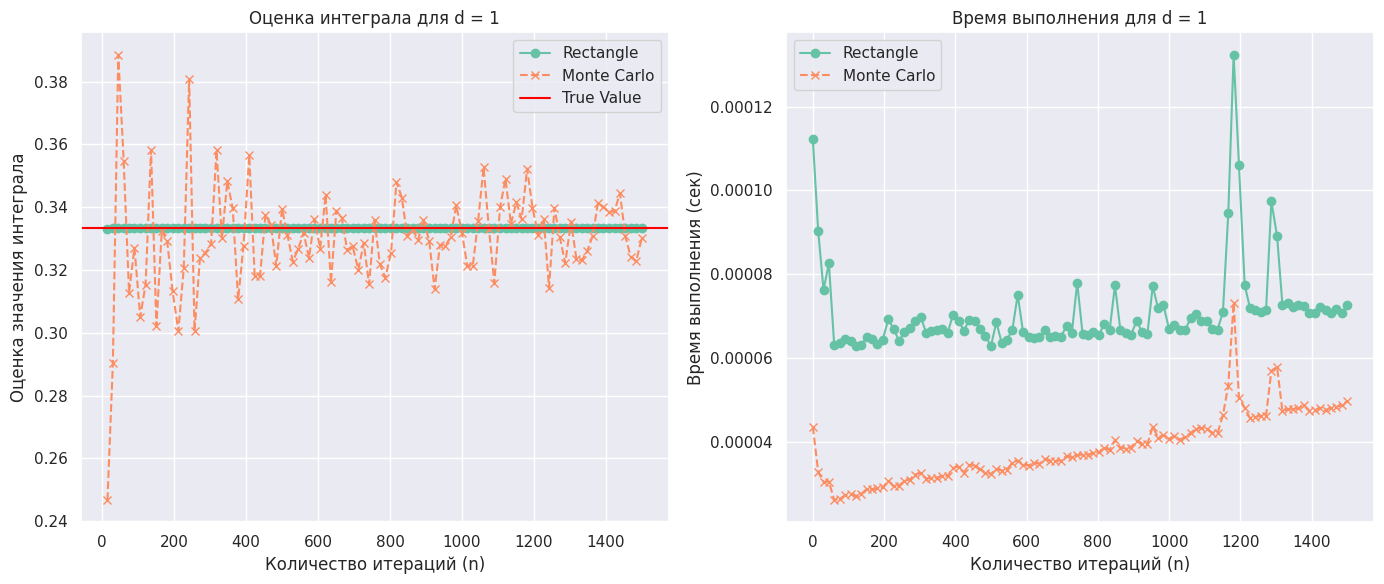

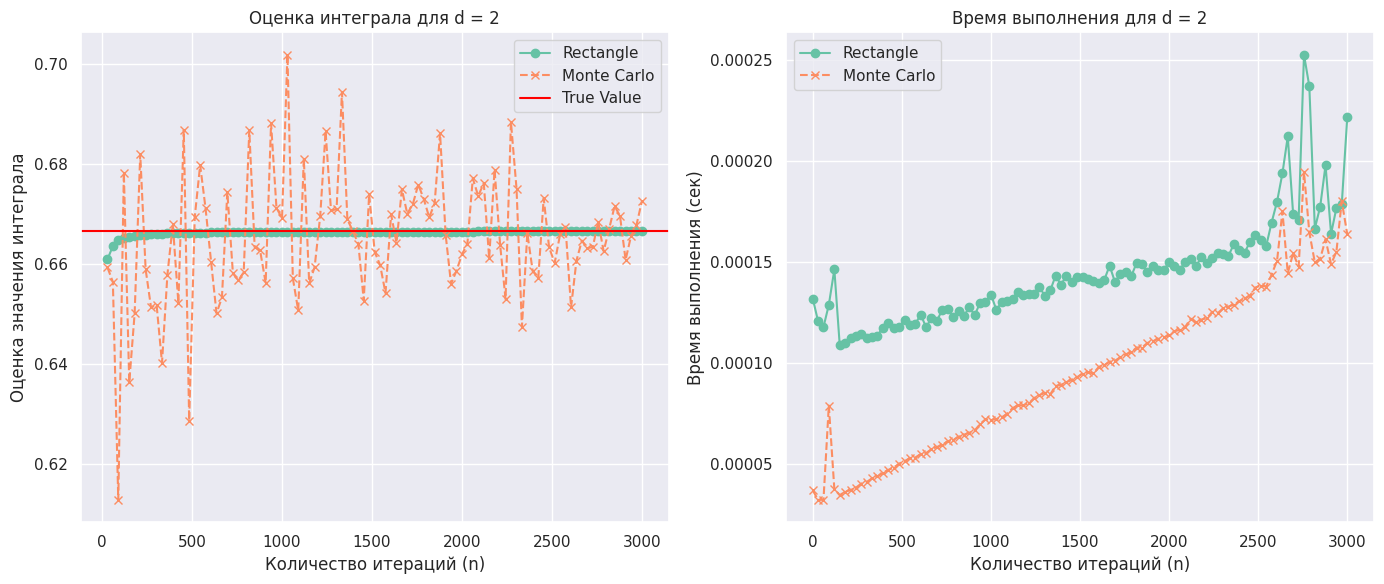

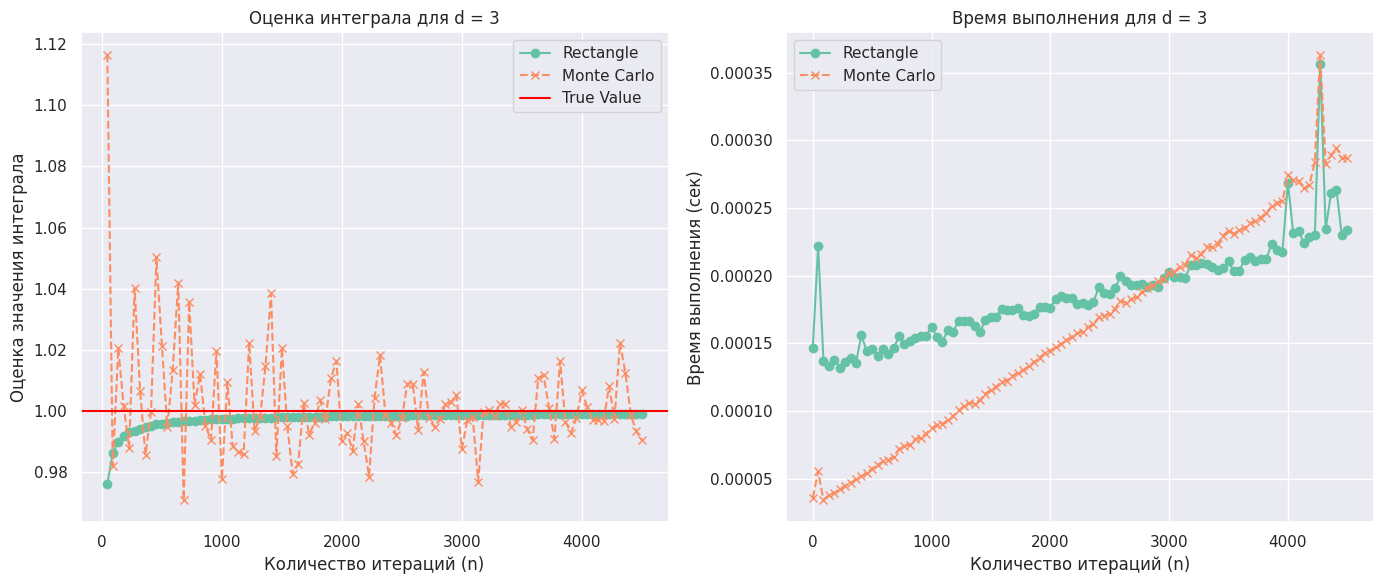

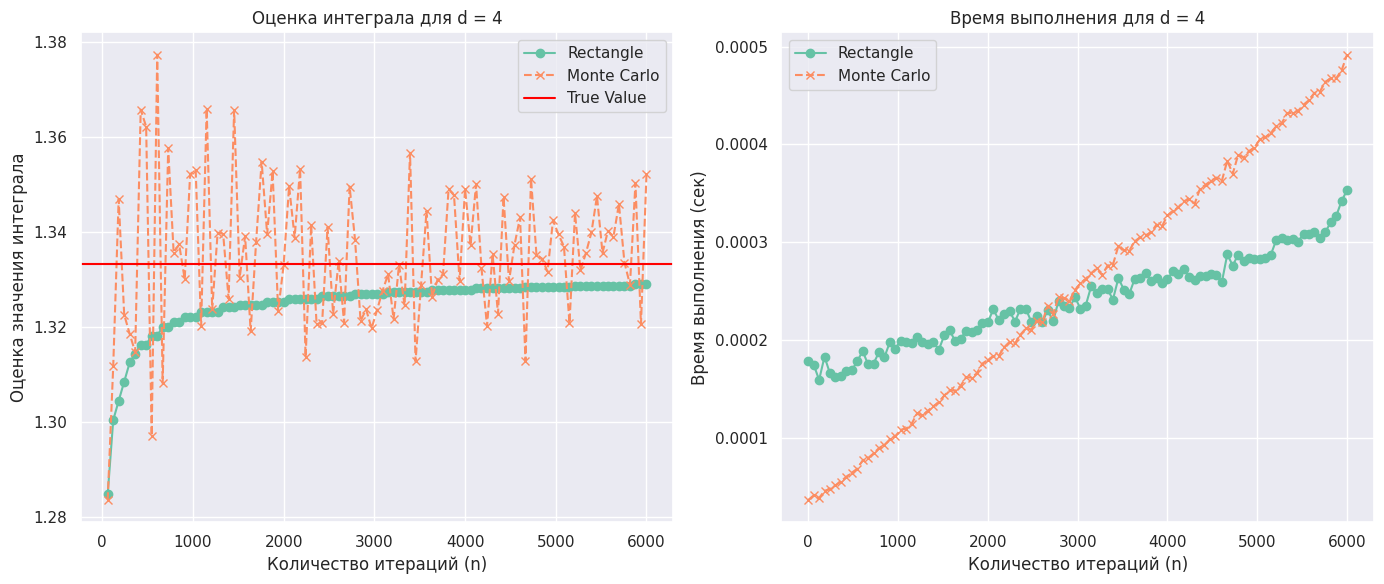

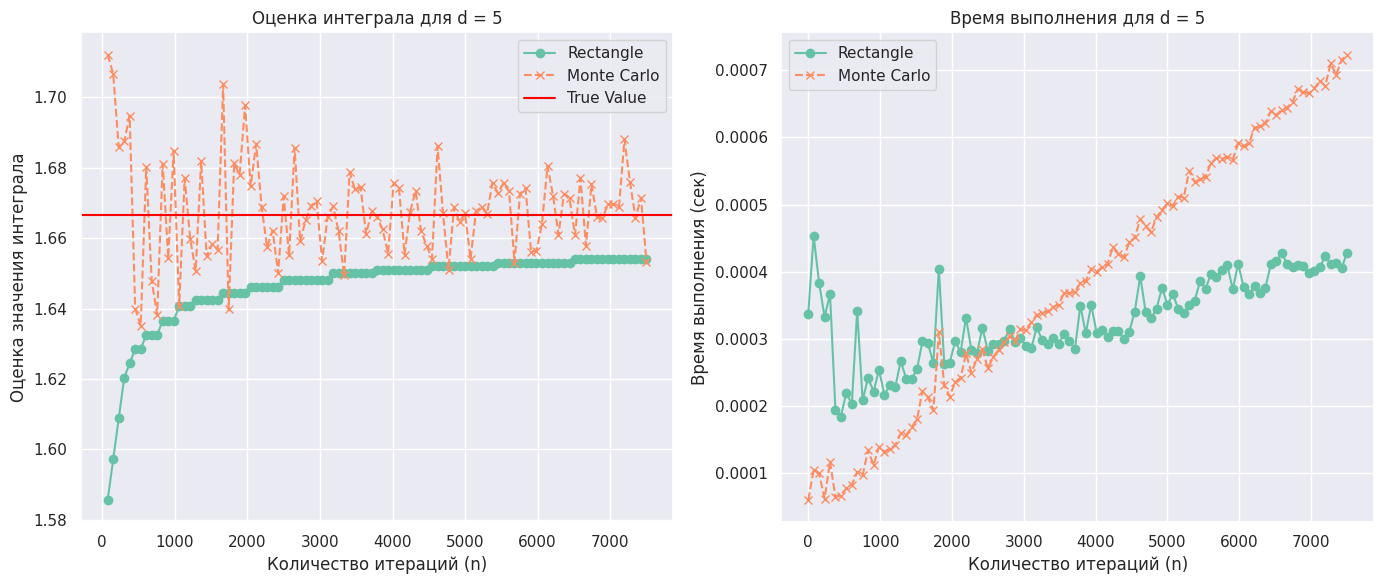

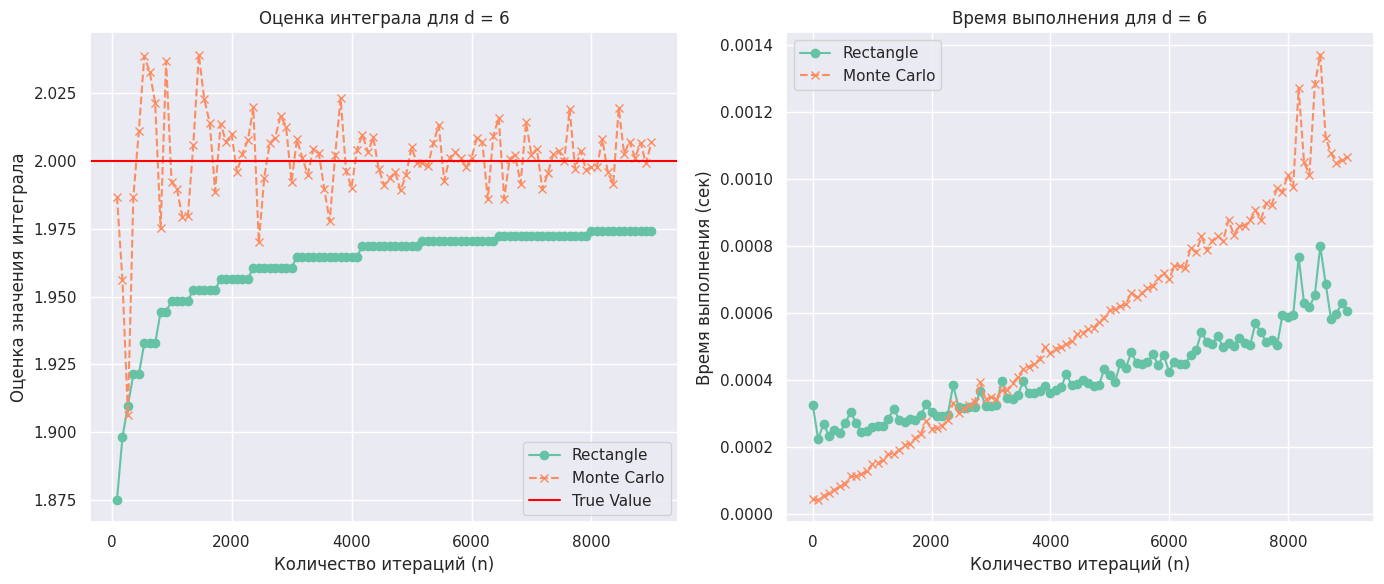

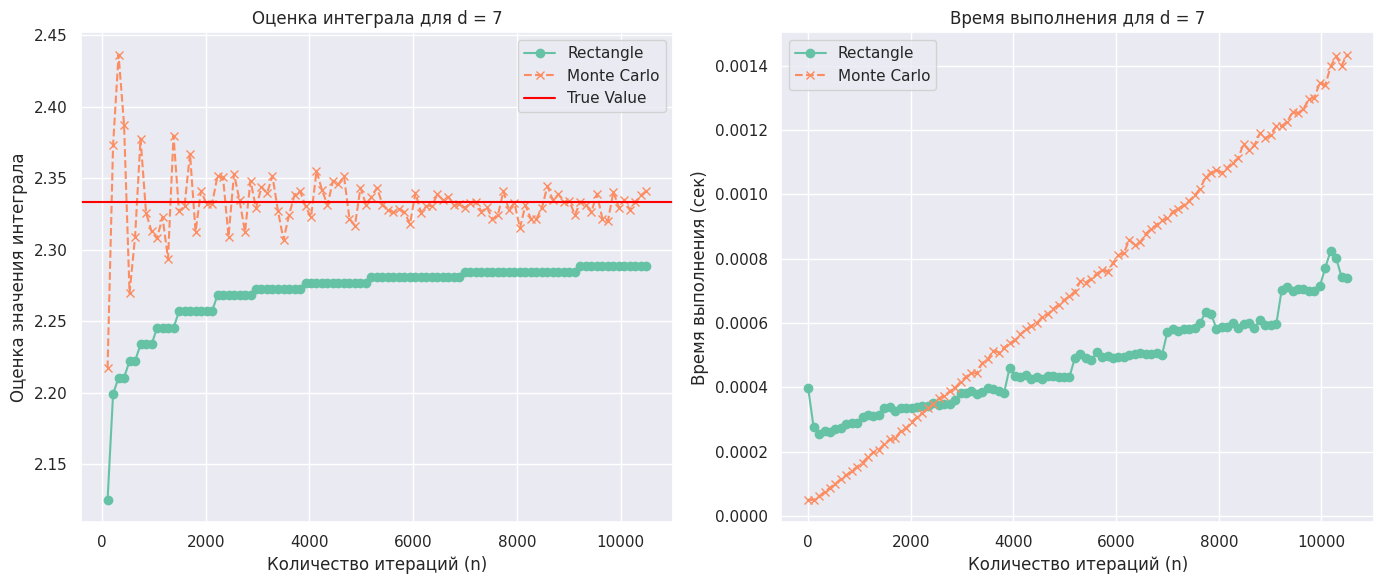

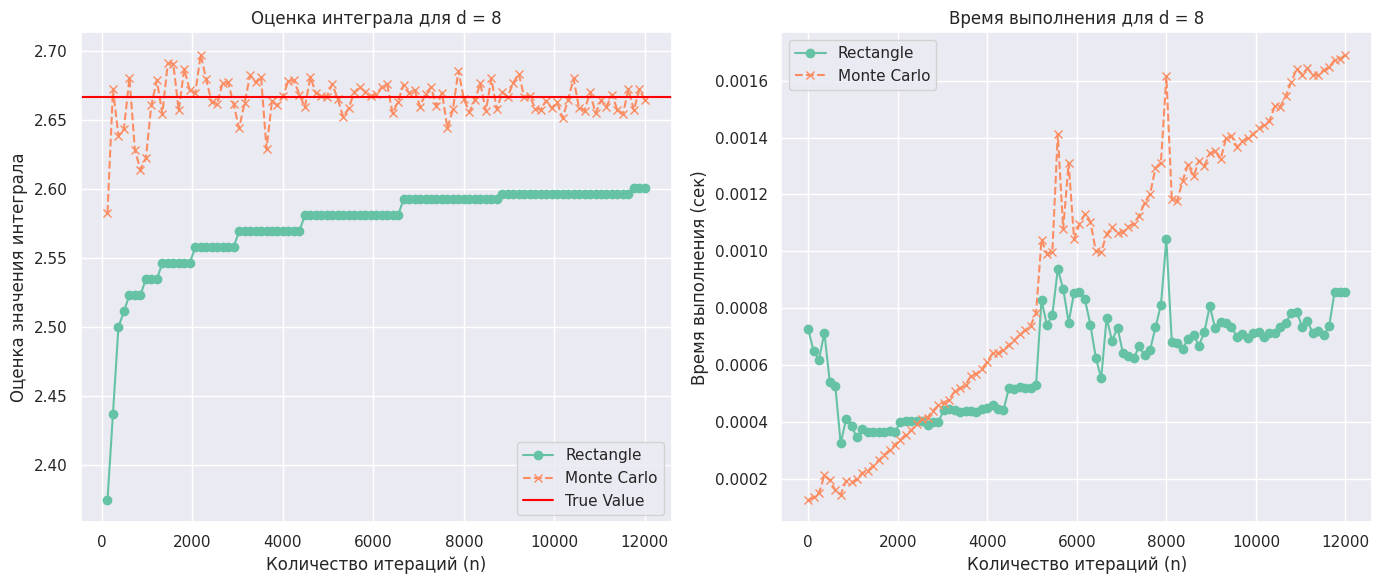

In [8]:
plot_integration_comparison(model, func_for_test, n_runs=10, min_d=1, max_d=8, max_n_per_d=1500)

Какой метод и при каких $d$ сходится быстрее? Предположите, в каком случае выгоднее использовать тот или иной метод. С чем связано такое поведение графиков?

**Вывод:** 
При маленьких d (до трех-четырех) лучше сходится метод прямоугольников

При больших -  сильно лучше показывает себя метод Монте-Карло, в части случаях метод прямоугольников даже не успевает сойтись.

Заметно однако, что время работы на одном и том же числе итераций меньше у метода прямоугольника.
Но из-за того, что методу Монте-Карло требуется сильно меньше итерацией для той же точности, он в действительности выигрыает по времени работы, т.к. нужно сравнивать времена работы на оптимальных числах итераций.

Итого:

d <= 3,4 -> прямоугольники

d >= 3,4 -> Монте-Карло

---
## Задача 2.

Оценим константу плотности нормального распределения с помощью численного интегрирования. Тем самым, необходимо оценить интеграл
$$\int\limits_{\mathbb{R}^d} \exp \left( - \frac12 x^Tx \right) dx = I.$$
При домножении интеграла на эту константу должна получиться единица.

Чему равно истинное значение этой константы?

$$
I = \int\limits_{\mathbb{R}^d} \prod_{i=1}^d \exp \left( - \frac{1}{2} x_i^2 \right) \, dx = \prod_{i=1}^d \int\limits_{-\infty}^{\infty} \exp \left( - \frac{1}{2} x_i^2 \right) \, dx_i.
$$


Каждый интеграл по одной переменной равен
$$
\int\limits_{-\infty}^{\infty} \exp \left( - \frac{1}{2} x_i^2 \right) \, dx_i = \int\limits_{-\infty}^{\infty} \exp \left( - u^2 \right)du \cdot \sqrt{2} = \sqrt{2 \pi}
$$


Поэтому весь интеграл равен
$$
I = (2 \pi)^{d/2}.
$$


Прежде чем переходить к оценке, поразмышляйте над следующими вопросами.
1. Что будет, если выбрать слишком большие пределы в методе Монте-Карло? 
2. Что может произойти, если выбрать слишком большие пределы в методе прямоугольников?
3. Что будет, если выбрать слишком маленькие пределы?
4. Какие пределы кажутся оптимальными и почему?

**Ответ:**
1. Может оказаться так, что все случайные точки попадут в хвосты распределения, и тогда интеграл будет сильно занижен. Так что колокол распределения должен быть чувствительным
2. Аналогично 1, но не сами точки, а середины прямоугольников
3. Наоборот, интеграл будет завышеным, если все ключевые точки попадут в максимальную часть
4. Колокол распределения должен быть чувствительным, то есть в него должны попадать ключевые точки (1-2), но при этом надо захватить кроме максима распределения еще часть хвостов (3), чтобы и туда попадали ключевые точки

Какие то неочевидные вещи могут появиться в многомерных пространствах в всязи с проклятием размерностей

Сравните результаты работы методов для случаев
* оптимальных пределов,
* слишком больших пределов,
* слишком маленьких пределов.

*Подсказка:* здесь достаточно несколько раз применить написанную ранее реализацию и сделать вывод.

In [9]:
def exponent(points):
    """
    Реализация функции для тестирования реализованных методов

    Функция - константа плотности нормального распределения
    
    На вход принимает матрицу (n, d), 
    где n - число точек, в которых нужно вычислить функцию,
    а d - размерность пространства переменных.
    
    Возвращает вектор длины n значений функциий в заданых точках

    """
    
    return np.exp(-0.5 * np.sum(points ** 2, axis=1))

In [10]:
def plot_integration_comparison_ranges(model, func_for_test, max_d=8):
    # Диапазоны значений для полуширины интервала b
    b_values_small = np.linspace(0, 20, 200)  # Маленькие и оптимальные
    b_values_large = np.linspace(20, 1000, 200)  # Сверхбольшие

    # Объединяем массивы
    b_values = np.concatenate((b_values_small, b_values_large))

    for d in range(1, max_d + 1):
        true_value = (2 * np.pi) ** (d / 2)  # Истинное значение интеграла
        
        rectangle_results = []
        monte_carlo_results = []

        for b in b_values:
            # Устанавливаем пределы интегрирования [-b, b]
            low = np.full(d, -b)
            high = np.full(d, b)

            # Метод прямоугольников
            rectangle_result = model.integrate(func=func_for_test, low=low, high=high, n_iter=1000 * d, method="rectangle")
                
            # Метод Монте-Карло
            monte_carlo_result = model.integrate(func=func_for_test, low=low, high=high, n_iter=1000 * d, method="monte_carlo")

            # Добавляем результаты
            rectangle_results.append(rectangle_result)
            monte_carlo_results.append(monte_carlo_result)

        # Построение графиков значения интеграла
        plt.figure(figsize=(10, 5))

        # График значения для метода прямоугольников
        plt.plot(2 * b_values, rectangle_results, label='Rectangle', marker='o')
        plt.plot(2 * b_values, monte_carlo_results, label='Monte Carlo', linestyle='--', marker='x')
        
        plt.axhline(y=true_value, color='r', linestyle='-', label='True Value')
        plt.xlabel('Ширина интервала интегрирования (2b)')
        plt.ylabel('Значение интеграла')
        plt.ylim(0, 2*true_value)
        plt.xscale('log')
        plt.title(f'Зависимость значения интеграла от ширины интервала для d = {d}')
        plt.legend()
        plt.grid(True)
        plt.show()


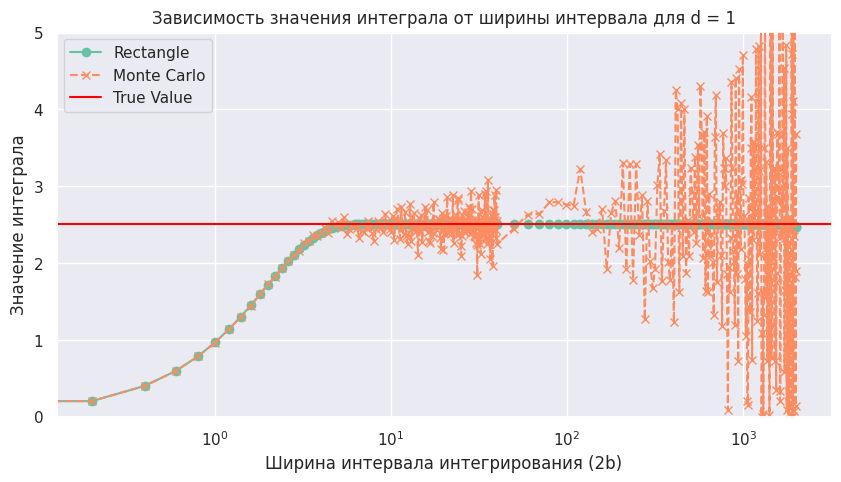

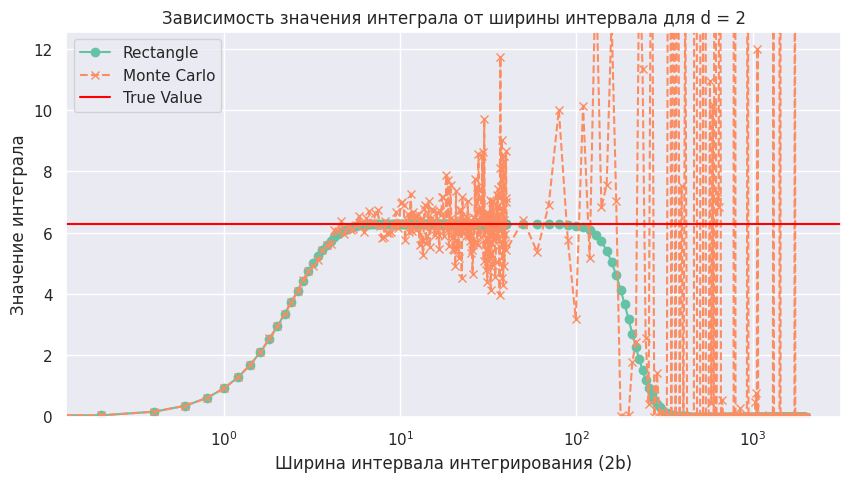

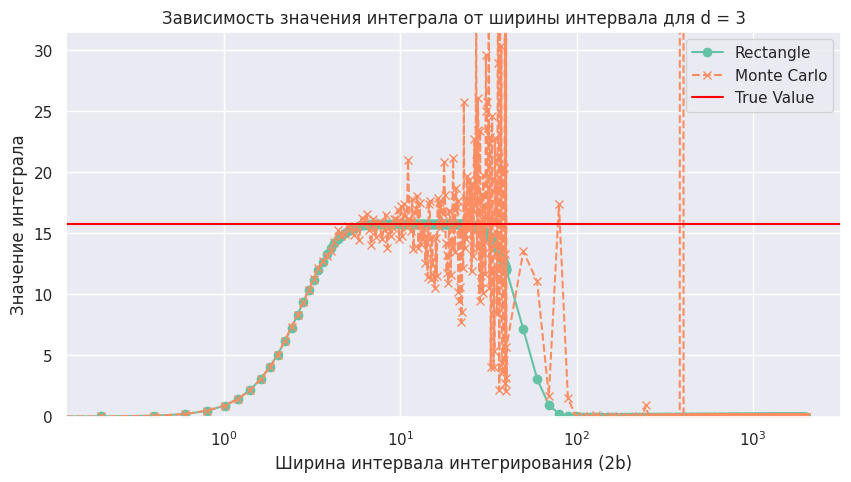

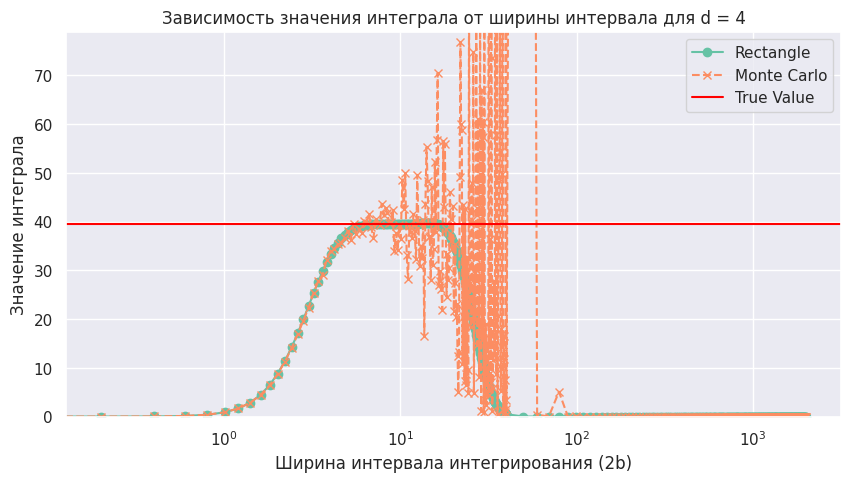

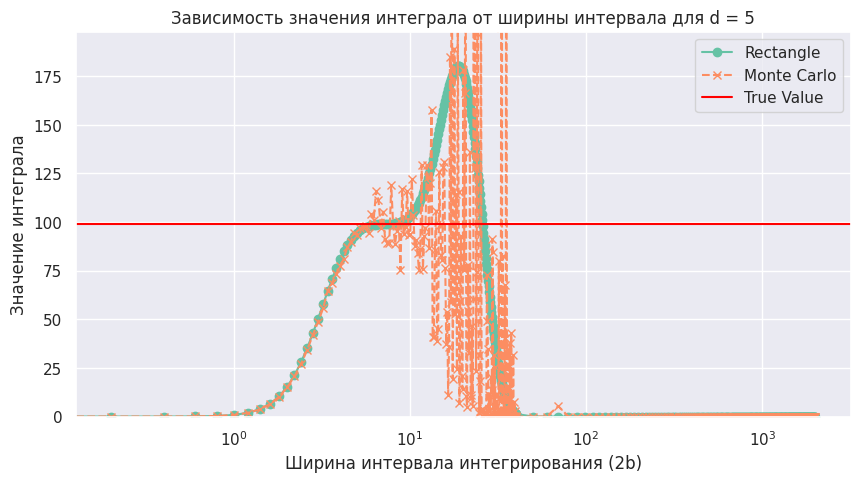

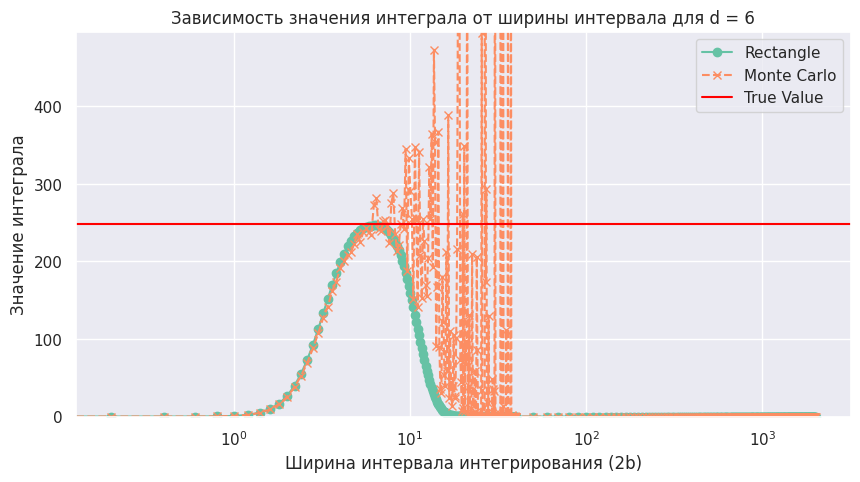

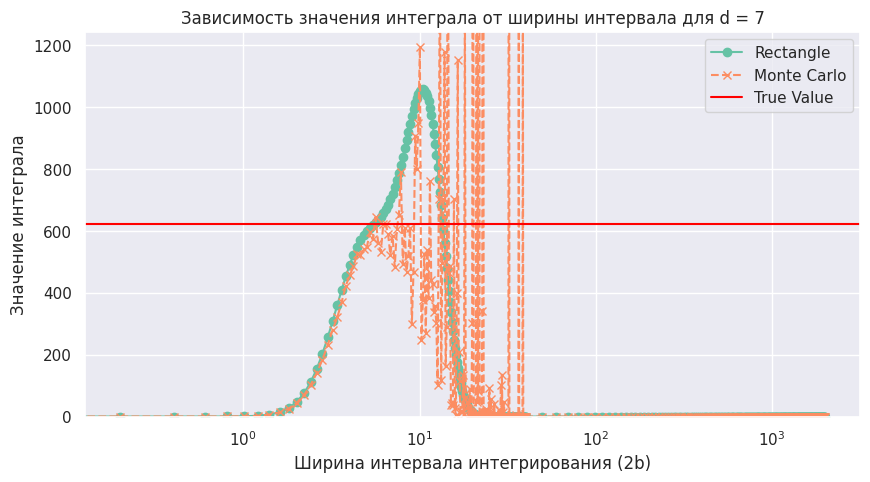

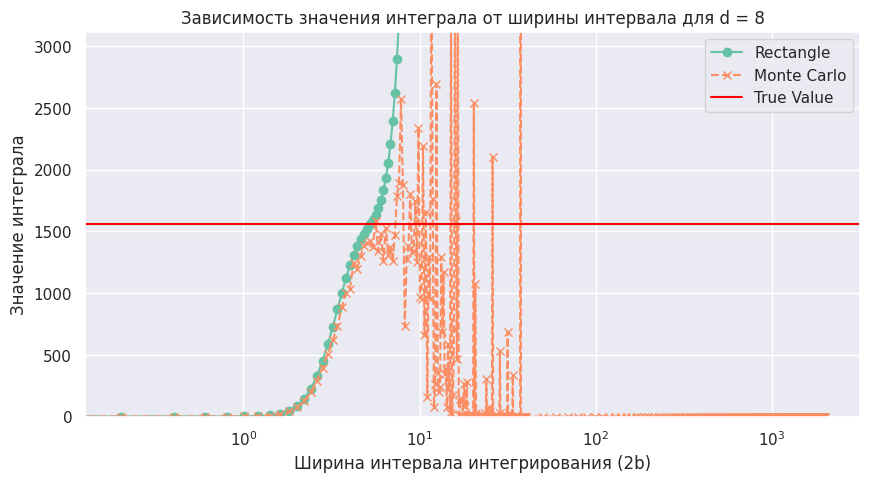

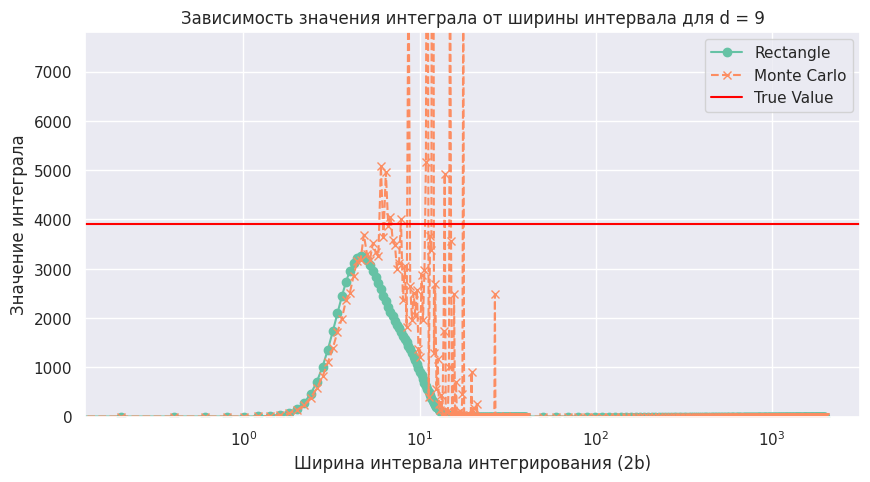

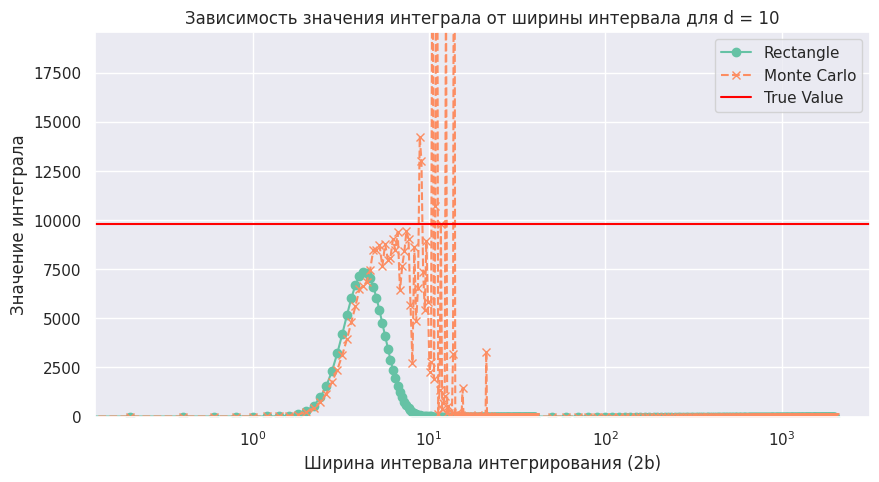

In [11]:
plot_integration_comparison_ranges(model, exponent, max_d = 10)

**Вывод:** 
Как видно, пределы, в которых интегрирование методом Монте-Карло точнее, больше, он более чувствительный.

При этом чем больше d тем оба метода точнее в меньших пределах. При слишком больших d методу прямоугольников не хватает число итераций, чтобы получить точное значение. 

Есть идея улучшить Монте-Карло тем, что можно брать несколько запусков и выбирать медианный результат, и тем самым уменьшить случайную ошибку.

---
## Задача 3.

Некоторая ML-модель имеет один параметр $\theta$, который обучается посредством *максимизации* функции
$$\mathcal{L}(\theta) = \mathsf{E} \exp\left(-\frac{\xi^2\sqrt{\eta}}{1+\theta^2}\right),$$
где $\xi$ имеет стандартное нормальное распределение, а $\eta$ &mdash; пуассоновское распределение с параметром 5 и не зависит от $\eta$.


Оптимизируйте эту функцию, используя стохастический градиентный спуск.

*Подсказка.* Обрати внимание на один из примеров с лекции. Кроме того, заметим, что класс из задачи 1 не подойдет для решения этой задачи. Достаточно написать семплирование непосредственно для этой задачи.

Несложное дифференцирование дает
$$
\frac{\partial \mathcal{L}_i(\theta)}{\partial \theta} = \mathcal{L}(\theta) \cdot \frac{2 \theta \xi_i^2 \sqrt{\eta}}{(1 + \theta^2)^2}.
$$
осталось реализовать сам градиентный спуск

Уход в +inf:

In [12]:
learning_rate = 1
num_samples = 100
num_iterations = 100000

theta = 10

for _ in range(num_iterations):
    xi = np.random.normal(0, 1, num_samples)
    eta = np.random.poisson(5, num_samples)
    
    function = np.exp(-xi**2 * np.sqrt(eta) / (1 + theta**2))
    # SGD
    gradient = np.sum(function * (2 * theta * xi**2 * np.sqrt(eta) / (1 + theta**2)**2)) / num_samples
    
    # Максимизация
    theta += learning_rate * gradient
    
    if _ % (num_iterations/10) == 0:
        print(f"Итерация {_}, theta: {theta}")

print(f"Оптимизированный theta: {theta}")


Итерация 0, theta: 10.003678661300983
Итерация 10000, theta: 20.54218827449143
Итерация 20000, theta: 24.302711942532408
Итерация 30000, theta: 26.84798576041264
Итерация 40000, theta: 28.835122529377767
Итерация 50000, theta: 30.479556337815094
Итерация 60000, theta: 31.899788467812787
Итерация 70000, theta: 33.15114405599932
Итерация 80000, theta: 34.276188580091684
Итерация 90000, theta: 35.29969952929977
Оптимизированный theta: 36.24157878399174


Уход в -inf:

In [13]:
learning_rate = 1
num_samples = 100
num_iterations = 100000

theta = -10

for _ in range(num_iterations):
    xi = np.random.normal(0, 1, num_samples)
    eta = np.random.poisson(5, num_samples)
    
    function = np.exp(-xi**2 * np.sqrt(eta) / (1 + theta**2))
    # SGD
    gradient = np.sum(function * (2 * theta * xi**2 * np.sqrt(eta) / (1 + theta**2)**2)) / num_samples
    
    # Максимизация
    theta += learning_rate * gradient
    
    if _ % (num_iterations/10) == 0:
        print(f"Итерация {_}, theta: {theta}")

print(f"Оптимизированный theta: {theta}")


Итерация 0, theta: -10.004428464809358
Итерация 10000, theta: -20.534220609073046
Итерация 20000, theta: -24.296706835221496
Итерация 30000, theta: -26.853108428962315
Итерация 40000, theta: -28.837856586471666
Итерация 50000, theta: -30.482073206226765
Итерация 60000, theta: -31.90022576890036
Итерация 70000, theta: -33.15039203636205
Итерация 80000, theta: -34.27447964322548
Итерация 90000, theta: -35.29522516757054
Оптимизированный theta: -36.23782816116847


Дополнительно: запуск в минимум

In [14]:
learning_rate = 1
num_samples = 100
num_iterations = 100000

theta = 10

for _ in range(num_iterations):
    xi = np.random.normal(0, 1, num_samples)
    eta = np.random.poisson(5, num_samples)
    
    function = np.exp(-xi**2 * np.sqrt(eta) / (1 + theta**2))
    # SGD
    gradient = np.sum(function * (2 * theta * xi**2 * np.sqrt(eta) / (1 + theta**2)**2)) / num_samples
    
    # Минимизация
    theta -= learning_rate * gradient
    
    if _ % (num_iterations/10) == 0:
        print(f"Итерация {_}, theta: {theta}")

print(f"Оптимизированный theta: {theta}")


Итерация 0, theta: 9.996351356438902
Итерация 10000, theta: 5e-324
Итерация 20000, theta: 5e-324
Итерация 30000, theta: 5e-324
Итерация 40000, theta: 5e-324
Итерация 50000, theta: 5e-324
Итерация 60000, theta: 5e-324
Итерация 70000, theta: 5e-324
Итерация 80000, theta: 5e-324
Итерация 90000, theta: 5e-324
Оптимизированный theta: 5e-324


**Вывод**

Если рассмотреть функцию
$$\exp \left( -\frac{1}{1 + x^2}\right)$$
То понятно, что максимум на +-inf, что сходится с запусками SGD для максимизации функции L

При дополнительном запуске на поиск минимума сходимость к нулю, что сходится с теорией.

___
## Задача 4.
 	
Рассмотрим проект по разработке нефтяного месторождения. В основе модели проекта лежат предварительные данные о величине резервов месторождения.

*Замечание.* Знания физики или экономики не требуются, нужно только внимательно прочитать и расписать все семплирования.



*Формулировка задачи от заказчика:*
Общая задача анализа &mdash; основываясь на величине запасов и проценте нефтеотдачи рассчитать NPV (чистая приведенная стоимость) проекта, а точнее, $0.1$-квантиль ее распределения.
Следующим этапом мы хотим использовать ее в качестве критерия оптимизации, то есть максимизировать такое значение NPV, которого мы можем достигнуть или превысить с $90\%$-й вероятностью, подобрав при этом оптимальное количество скважин на месторождении.



Предположим, что на месторождении есть $n$ скважин. Эти скважины добывают некоторую смесь, которая состоит из воды, нефти и различных примесей. Доля нефти из добытого материала называется <a href="https://ru.wikipedia.org/wiki/Нефтеотдача">коэффициентом нефтеотдачи</a> $k$. Мы будем считать, что этот коэффициент является одинаковым для всего месторождения и имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$.




**Добыча нефти скважиной за год**

<a href="http://vseonefti.ru/upstream/stadii-razrabotki.html">Разработка месторождения</a> включает три этапа:
1. фаза роста добычи &mdash; период введения в работу новых скважин;
2. фаза плато: после достижения определенного уровня добычи, она некоторое время продолжается на постоянном уровне;
3. фаза снижения добычи &mdash; период, когда темпы добычи экспоненциально снижаются с течением времени.


Для упрощения задачи мы пропустим два первых этапа и рассмотрим только последний.


Каждая скважина $j$ характеризуется параметром $q_j$ &mdash; темп добычи из скважины, определяемый объемом вещества (смесь нефти, воды и др.), добываемого скважиной за сутки. Будем считать, что этот параметр является одинаковым для скважины в течении всего периода разработки и имеет нормальное распределение со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей. Темпы добычи для разных скважин считаются независимыми случайными величинами.

Соответственно, за год $t$ скважина добывает $Q_{tj} = 365 \cdot k \cdot q_j \cdot e^{-0.008 \cdot n \cdot (t-1)}$ тыс. баррелей нефти, где экспонента отвечает за снижение добычи с течением времени.
Всего за год $t$ на месторождении добывается $Q_t = \sum\limits_{j=1}^{n} Q_{tj}$ тыс. баррелей нефти.




**Прибыль**

Стоимость барреля нефти будем считать постоянной и равной $c = 70$ долларов за баррель. Однако, для расчета стоимости нужно учесть <a href="https://ru.wikipedia.org/wiki/Ставка_дисконтирования">ставку дисконтирования</a> &mdash; процентная ставка, используемая для пересчета будущих потоков доходов в единую величину текущей стоимости (см. формулу далее). Обозначим ее $i$ и будем считать, что она имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$.

Стоимость добытой нефти за год $t$ составит (тыс. баррелей)
$$\frac{c \cdot Q_t}{(1+i)^{t-1}}.$$

Будем считать, что разработка месторождения прекращается, если за год на всем месторождении было добыто менее $100$ тыс. баррелей нефти. Последний год разработки обозначим $T$.




**Затраты**

Затраты на месторождение (кроме скважин) составляют $C_{\text{мест.}} = 200$ млн. долларов в год. Будем считать, что издержки на содержание скважины $j$ за весь период разработки имеют треугольное распределение (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html">scipy.stats.triang</a>) c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов. Обозначим эти случайные величины $C^j_{\text{скв.}}$ и будем считать их независимыми.




**NPV**

Теперь мы можем написать формулу NPV
$$NPV = \sum\limits_{t=1}^T \frac{c \cdot Q_t}{(1+i)^{t-1}} - T \cdot C_{\text{мест.}} - \sum\limits_{j=1}^{n} C^j_{\text{скв.}}.$$




**Задание**

С помощью метода Монте-Карло требуется найти число $x$, при котором $$\mathsf{P}(NPV < x) = 0.1.$$

Количество итераций метода должно быть не менее $100\ 000$. На основе проделанных итераций оцените также среднее значение NPV и вероятность, с которой NPV будет положительна. Кроме того, постройте нормированную гистограмму значений NPV с помощью `plt.hist(values, bins=200, density=True)`.



Перечислим еще раз все *случайные величины*:
* Коэффициент нефтеотдачи $k$ имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$;
* $q_1, ..., q_{n}$ &mdash; темпы добычи из скважин &mdash; независимые нормальные случайные величины со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей;
* Ставка дисконтирования $i$ имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$;
* $C^1_{\text{скв.}}, ..., C^{n}_{\text{скв.}}$ &mdash; затраты на каждую скважину &mdash; независимые  случайные величины, имеющие треугольное распределение c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов (используйте `sps.triang(loc=90, c=1/3, scale=30)`).

Параметры считать независимыми.

*Фиксированные параметры*:
* $n = 25$ скважин;
* $365$ дней в году;
* $c=70$ долларов за баррель &mdash; стоимость нефти;
* $100$ тыс. баррелей &mdash; объем добытой нефти за год, при котором разработка месторождения прекращается;
* $200$ млн. долларов в год &mdash; затраты на месторождение.

*Замечания по решению*:
* Все случайные величины надо сгенерировать заранее, до вычисления значений $T$.
* Не стоит выводить явную формулу для $T$, **используйте цикл по годам**.
* Запрещается использовать цикл по количеству элементов в выборке.

**Решение:**

In [15]:
def calculate_npv():
    n = 25
    days_in_year = 365
    c = 70
    bad_production = 100
    cost_in_year = 200

    k = sps.norm.rvs(loc=0.42, scale=0.012)
    q = sps.norm.rvs(loc=10, scale=3, size=n)
    i = sps.norm.rvs(loc=0.10, scale=0.012)
    costs = sps.triang.rvs(c=1/3, loc=90, scale=30, size=n)
    
    T = 0
    total_revenue = 0
    while True:
        T += 1
        production = np.sum(days_in_year * k * q * np.exp(-0.008 * n * (T - 1)))
        revenue = c * production / (1 + i) ** (T - 1)
        total_revenue += revenue

        if production < bad_production:
            break
    
    total_cost = cost_in_year * T + np.sum(costs)
    npv = total_revenue - total_cost
    
    return npv

0.1-квантиль NPV: 9515023.141088529
Среднее значение NPV: 10494801.120374398
Вероятность положительного NPV: 1.0


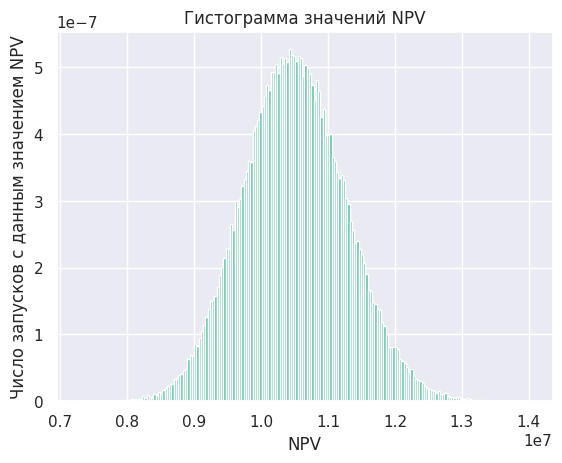

In [16]:
n_iter = 100000

npv_values = np.array([calculate_npv() for _ in range(n_iter)])

quantile_0_1 = np.percentile(npv_values, 10)
mean_npv = np.mean(npv_values)
prob_positive_npv = np.sum(npv_values > 0) * 1.0 / len(npv_values)
запусками
print(f"0.1-квантиль NPV: {quantile_0_1}")
print(f"Среднее значение NPV: {mean_npv}")
print(f"Вероятность положительного NPV: {prob_positive_npv}")

plt.hist(npv_values, bins=200, density=True)
plt.xlabel('NPV')
plt.ylabel('Число запусков с данным значением NPV')
plt.title('Гистограмма значений NPV')
plt.show()

**Вывод:**

0.1-квантиль NPV: 9515023

Среднее значение NPV: 10494801

Вероятность положительного NPV: 1.0

Метод Монте-Карло хорошо подходит под эту задачу, она свелась к простому генерации большого числа исходов, хотя изначальная постановка задачи кажется очень сложной. При этом можно посчитать довольно широкий класс статистик, просто потому, что мы генерируем само распределение.